<a href="https://colab.research.google.com/github/owilli38/Inventory-Mismatch-Unlocking-Hidden-Revenue-/blob/main/Visual_Analytics%2C_Final_Project_Review_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf

from keras.datasets import imdb

from keras.models import Sequential  # Model type to be used


from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model

In [ ]:
data = pd.read_csv('FF Reviews.csv', encoding='latin-1')

In [ ]:
data

,Review Data,Review Stars,Review Content
0,10/21/2025,5,"Nate was absolutely excellent, beyond patient ..."
1,10/17/2025,5,Wonderful experience with Joe finding a person...
2,10/16/2025,5,Fleet Feet Birkdale made shoe shopping such a ...
3,10/15/2025,5,Have made several purchases now at several dif...
4,10/10/2025,5,"Owen is a *gem*. So helpful, knowledgeable, & ..."
...,...,...,...
568,1/16/2020,5,After having foot surgery I really wanted a go...
569,1/12/2020,5,NaN
570,1/6/2020,5,Y'all! This place is amazing. They measured my...
571,1/5/2020,5,Friendly and knowledgeable associates. A great...


In [ ]:
data['Review Stars'].mean()

np.float64(4.938917975567191)

In [ ]:
data.head()

,Review Data,Review Stars,Review Content
0,10/21/2025,5,"Nate was absolutely excellent, beyond patient ..."
1,10/17/2025,5,Wonderful experience with Joe finding a person...
2,10/16/2025,5,Fleet Feet Birkdale made shoe shopping such a ...
3,10/15/2025,5,Have made several purchases now at several dif...
4,10/10/2025,5,"Owen is a *gem*. So helpful, knowledgeable, & ..."


**Topic Modeling**

In [ ]:
data_text = data[['Review Content ']].copy()

In [ ]:
data_text

,Review Content
0,"Nate was absolutely excellent, beyond patient ..."
1,Wonderful experience with Joe finding a person...
2,Fleet Feet Birkdale made shoe shopping such a ...
3,Have made several purchases now at several dif...
4,"Owen is a *gem*. So helpful, knowledgeable, & ..."
...,...
568,After having foot surgery I really wanted a go...
569,NaN
570,Y'all! This place is amazing. They measured my...
571,Friendly and knowledgeable associates. A great...


In [ ]:
#add a column to data_text for the row index
data_text['index'] = data_text.index

In [ ]:
len(data_text)

573

In [ ]:
data_sample = data_text[data_text['index'] == 347]
data_sample

,Review Content,index
347,Tyler was AWESOME!!!!!\n\nGreat service!\nGrea...,347


In [ ]:
#take a look at the content of a document with Index# 347; data_sample is a dataframe. [0][0] is to extract the value of the first row and the first column
doc_sample = data_sample.values[0][0]

In [ ]:
doc_sample

'Tyler was AWESOME!!!!!\n\nGreat service!\nGreat products!!!!\nGreat return policy!!!!'

In [ ]:
!pip install gensim nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 67.0 MB/s eta 0:00:00


In [ ]:
#We will perform the following steps:
 #Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation. Done by "gensim.utils.simple_preprocess()"
 #Words that have fewer than 3 characters are removed.
 #All stopwords are removed.
 #Words are lemmatized — verbs in third person are changed to first person and verbs in past and future tenses are changed into present tense.
 #Words are stemmed — words are reduced to their root form.


#import relvant packages for conduct topic modeling analysis
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

from nltk.stem import *
stemmer = PorterStemmer()

In [ ]:
len(gensim.parsing.preprocessing.STOPWORDS)

337

In [ ]:
#a function to perform lemmatize and stem preprocessing steps on the data set. Without contextual information the lemmatiser’s not able to distinguish between nouns and verbs. In this case, "pos = 'v'" means treat the words as verbs.

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
#remove na values from the column 'headline_text'
data_text = data_text.dropna(subset=['Review Content '])

In [ ]:
#select a document to preview after preprocessing
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\npreprocessed document: ')
print(preprocess(doc_sample))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['Tyler', 'was', 'AWESOME!!!!!\n\nGreat', 'service!\nGreat', 'products!!!!\nGreat', 'return', 'policy!!!!']

preprocessed document: 
['tyler', 'awesom', 'great', 'servic', 'great', 'product', 'great', 'return', 'polici']


In [ ]:
#preprocess'headline_text', save the results as 'processed_docs'
processed_docs = data_text['Review Content '].map(preprocess)
processed_docs[:10]

,Review Content
0,"[nate, absolut, excel, patient, gentl, kind, e..."
1,"[wonder, experi, find, person, advanc, foot, i..."
2,"[fleet, feet, birkdal, shoe, shop, easi, exper..."
3,"[purchas, differ, locat, hickori, huntersvil, ..."
4,"[owen, help, knowledg, thorough]"
5,"[excel, servic, appreci, time, take, sure, sho..."
6,"[nice, store, good, select, great, custom, ser..."
7,"[fleet, feet, birkdal, great, sure, right, sho..."
8,"[servic, huntersvil, store, excel, staff, frie..."
9,"[tyler, birkdal, fleet, feet, work, year, stor..."


In [ ]:
#create a dictionary from ‘processed_docs’ containing the number of times a word appears in the document set
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
#Filter out tokens that appear in
 #less than 15 documents (absolute number) or
 #more than 0.5 documents (fraction of total corpus size, not absolute number).
 #after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
#For each document we created a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[347]

[(1, 1), (5, 1), (19, 1), (20, 1), (36, 1), (38, 1), (42, 1), (73, 1)]

In [ ]:
for i in range(len(bow_corpus[347])):
    print("Word {} (\"{}\") appears {} time.".format(bow_corpus[347][i][0], dictionary[bow_corpus[347][i][0]], bow_corpus[347][i][1]))

Word 1 ("easi") appears 1 time.
Word 5 ("knowledg") appears 1 time.
Word 19 ("feet") appears 1 time.
Word 20 ("fleet") appears 1 time.
Word 36 ("need") appears 1 time.
Word 38 ("staff") appears 1 time.
Word 42 ("great") appears 1 time.
Word 73 ("want") appears 1 time.


In [ ]:
#run LDA using bag of words
#Because LDA uses randomness in both training and inference steps, setting a random state is very important to control the randomness to make answers repeatable.
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2,random_state=2023)

In [ ]:
#for each topic, we will explore the words occuring in that topic and its relative weight.

for idx, topic in lda_model.print_topics(-1): # print all the topics. (-1) means all the topics.
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.105*"great" + 0.065*"knowledg" + 0.053*"staff" + 0.052*"feet" + 0.044*"help" + 0.043*"run" + 0.038*"fleet" + 0.037*"need" + 0.034*"servic" + 0.033*"store"
Topic: 1 
Words: 0.059*"experi" + 0.052*"feet" + 0.048*"need" + 0.047*"great" + 0.044*"help" + 0.037*"time" + 0.034*"knowledg" + 0.030*"recommend" + 0.029*"servic" + 0.027*"friendli"
Topic: 2 
Words: 0.092*"store" + 0.070*"feet" + 0.046*"thank" + 0.045*"fleet" + 0.038*"servic" + 0.036*"huntersvil" + 0.034*"time" + 0.032*"walk" + 0.031*"great" + 0.025*"experi"
Topic: 3 
Words: 0.066*"help" + 0.059*"feet" + 0.051*"fleet" + 0.039*"time" + 0.038*"knowledg" + 0.030*"work" + 0.030*"right" + 0.029*"best" + 0.028*"perfect" + 0.027*"need"
Topic: 4 
Words: 0.067*"knowledg" + 0.060*"great" + 0.047*"feel" + 0.045*"person" + 0.040*"select" + 0.037*"patient" + 0.037*"time" + 0.034*"staff" + 0.033*"help" + 0.033*"shop"
Topic: 5 
Words: 0.090*"help" + 0.056*"feet" + 0.047*"servic" + 0.045*"custom" + 0.036*"great" + 0.034*"foot" + 

In [ ]:
lda_model[bow_corpus[347]]

[(0, np.float32(0.89998263)),
 (1, np.float32(0.011113072)),
 (2, np.float32(0.011112862)),
 (3, np.float32(0.011113252)),
 (4, np.float32(0.011113324)),
 (5, np.float32(0.011113519)),
 (6, np.float32(0.0111126695)),
 (7, np.float32(0.011112744)),
 (8, np.float32(0.011113129)),
 (9, np.float32(0.011112681))]

In [ ]:
#check the topic distribution for the Document# 347.
#"tup:-1tup[1]" is a parameter for the key lambda for the sorted function. It means sorting by the reverse order of the topic socre.
for index, score in sorted(lda_model[bow_corpus[347]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10))) #for each topic, print the top 10 words in that topic.


Score: 0.899982750415802	 
Topic: 0.105*"great" + 0.065*"knowledg" + 0.053*"staff" + 0.052*"feet" + 0.044*"help" + 0.043*"run" + 0.038*"fleet" + 0.037*"need" + 0.034*"servic" + 0.033*"store"

Score: 0.011113478802144527	 
Topic: 0.090*"help" + 0.056*"feet" + 0.047*"servic" + 0.045*"custom" + 0.036*"great" + 0.034*"foot" + 0.031*"place" + 0.030*"store" + 0.029*"pair" + 0.027*"good"

Score: 0.011113324202597141	 
Topic: 0.067*"knowledg" + 0.060*"great" + 0.047*"feel" + 0.045*"person" + 0.040*"select" + 0.037*"patient" + 0.037*"time" + 0.034*"staff" + 0.033*"help" + 0.033*"shop"

Score: 0.011113251559436321	 
Topic: 0.066*"help" + 0.059*"feet" + 0.051*"fleet" + 0.039*"time" + 0.038*"knowledg" + 0.030*"work" + 0.030*"right" + 0.029*"best" + 0.028*"perfect" + 0.027*"need"

Score: 0.011113127693533897	 
Topic: 0.102*"help" + 0.059*"feet" + 0.056*"knowledg" + 0.046*"pair" + 0.033*"run" + 0.032*"staff" + 0.030*"store" + 0.029*"foot" + 0.027*"fleet" + 0.025*"patient"

Score: 0.0111130718141794

In [ ]:
#check the topic coverage for a new document (not in the corpus)

unseen_document = 'They lacked inventory and multiple colors. I wish they had more options in my size.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5))) #for each topic, print the top 5 words in that topic.

Score: 0.699941098690033	 Topic: 0.090*"help" + 0.056*"feet" + 0.047*"servic" + 0.045*"custom" + 0.036*"great"
Score: 0.033346109092235565	 Topic: 0.067*"go" + 0.057*"differ" + 0.054*"help" + 0.052*"recommend" + 0.043*"awesom"
Score: 0.03334299474954605	 Topic: 0.066*"help" + 0.059*"feet" + 0.051*"fleet" + 0.039*"time" + 0.038*"knowledg"
Score: 0.03334284573793411	 Topic: 0.100*"servic" + 0.050*"store" + 0.049*"best" + 0.048*"custom" + 0.045*"feet"
Score: 0.03334221988916397	 Topic: 0.102*"help" + 0.059*"feet" + 0.056*"knowledg" + 0.046*"pair" + 0.033*"run"
Score: 0.033339571207761765	 Topic: 0.073*"servic" + 0.067*"knowledg" + 0.060*"excel" + 0.058*"staff" + 0.055*"run"
Score: 0.033337272703647614	 Topic: 0.067*"knowledg" + 0.060*"great" + 0.047*"feel" + 0.045*"person" + 0.040*"select"
Score: 0.033337078988552094	 Topic: 0.105*"great" + 0.065*"knowledg" + 0.053*"staff" + 0.052*"feet" + 0.044*"help"
Score: 0.03333577886223793	 Topic: 0.059*"experi" + 0.052*"feet" + 0.048*"need" + 0.047

**Word Cloud**


In [ ]:
!pip install wordcloud matplotlib

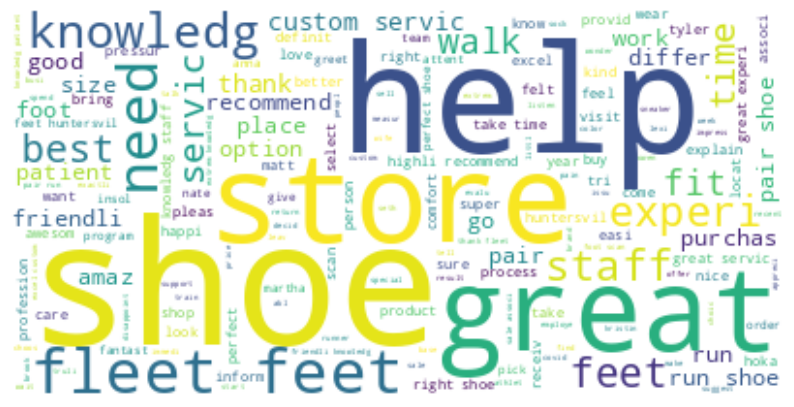

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the processed words back into a single string
long_string = ','.join([' '.join(review) for review in processed_docs])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Exploration**


In [ ]:
data['Review Stars'].value_counts()

,count
Review Stars,
5,558
4,7
1,5
2,2
3,1
